In [6]:
import pandas as pd
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [5]:
#!pip install opencv-python

In [124]:
image = cv2.imread('Documents/Learning/simulated_datasets-master/images/plane.jpg', cv2.IMREAD_GRAYSCALE)

(<matplotlib.image.AxesImage at 0x126b34d30>, (-0.5, 3599.5, 2269.5, -0.5))

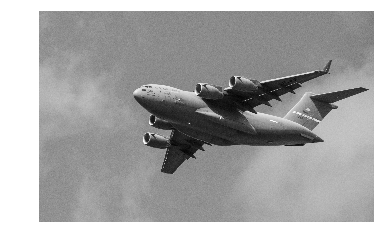

In [125]:
plt.imshow(image, cmap="gray"), plt.axis("off")

In [126]:
type(image)

numpy.ndarray

In [127]:
image

array([[140, 136, 146, ..., 132, 139, 134],
       [144, 136, 149, ..., 142, 124, 126],
       [152, 139, 144, ..., 121, 127, 134],
       ...,
       [156, 146, 144, ..., 157, 154, 151],
       [146, 150, 147, ..., 156, 158, 157],
       [143, 138, 147, ..., 156, 157, 157]], dtype=uint8)

In [128]:
image.shape

(2270, 3600)

In [129]:
image[0, 0]

140

In [130]:
image_bgr = cv2.imread('Documents/Learning/simulated_datasets-master/images/plane.jpg', cv2.IMREAD_COLOR)

In [131]:
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

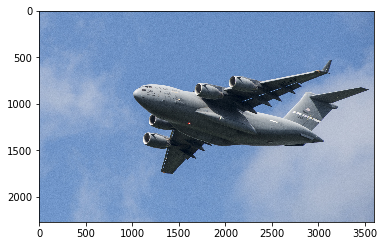

In [132]:
plt.imshow(image_rgb)

### Saving Images

In [133]:
#Save images for preprocessing

In [134]:
image1 = cv2.imread("Documents/Learning/simulated_datasets-master/images/plane.jpg", cv2.IMREAD_GRAYSCALE)

In [135]:
cv2.imwrite("Documents/Learning/plane2.jpg", image1)

True

### Image Resizing

In [136]:
#Resize the image for preprocessing

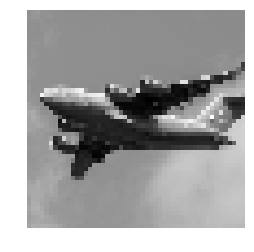

In [137]:

image256 = cv2.imread("Documents/Learning/simulated_datasets-master/images/plane_256x256.jpg", cv2.IMREAD_GRAYSCALE)
img=cv2.resize(image256, (50, 50))
plt.imshow(img, cmap="gray"), plt.axis("off")
plt.show()


### Cropping of Images

In [138]:
#Remove outer portion of the image to change its direction

In [139]:
image_cropped = image256[:, :128]

(<matplotlib.image.AxesImage at 0x126eb4e48>, (-0.5, 127.5, 255.5, -0.5))

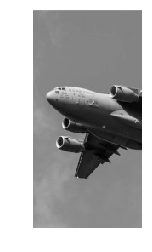

In [140]:
plt.imshow(image_cropped, cmap="gray"), plt.axis("off")

### Blurring of image

In [141]:
#Smooth out an image

In [142]:
#To blur an image, each pixel is transformed to be the average value of its neighbors.
#This neighbor and the operation performed are mathematically represented as a kernel.
#The size of this kernel deter‐ mines the amount of blurring, with larger kernels producing smoother images.

In [143]:
image_blurred = cv2.blur(image256, (30, 30))

(<matplotlib.image.AxesImage at 0x126f1c9e8>,
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

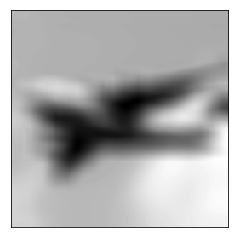

In [144]:
plt.imshow(image_blurred, cmap="gray"), plt.xticks([]), plt.yticks([])

In [145]:
#Blurring image with kernel

In [146]:
kernel = np.ones((5,5))/25.0

In [147]:
image_kernel = cv2.filter2D(image256, -1, kernel)

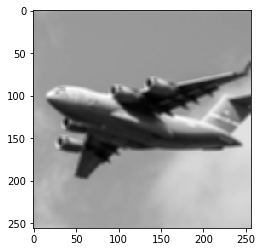

In [148]:
plt.imshow(image_kernel, cmap="gray")

### Sharpening Image

In [149]:
#Sharpen an image using kernel
#Create kernel that highlights the target pixel, and apply them using filter2D

In [150]:
kernel1 = np.array([[0, -1, 0],
                  [-1, 5, -1],
                  [0, -1, 0]])

In [151]:
img_sharp = cv2.filter2D(image256, -1, kernel)

(<matplotlib.image.AxesImage at 0x1237212e8>, (-0.5, 255.5, 255.5, -0.5))

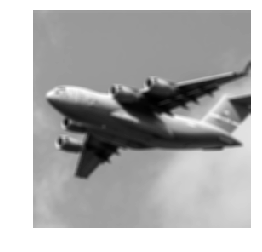

In [152]:
plt.imshow(img_sharp, cmap="gray"), plt.axis("off")

In [153]:
#Sharpening works similarly to blurring, except instead of using a kernel to average the neighboring values, 
#we constructed a kernel to highlight the pixel itself.
#The resulting effect makes contrasts in edges stand out more in the image.

### Enhancing the Contrast

In [154]:
#Increase the contrast between the pixel of images

In [155]:
img_enhance = cv2.equalizeHist(image256)

(<matplotlib.image.AxesImage at 0x12386f8d0>, (-0.5, 255.5, 255.5, -0.5))

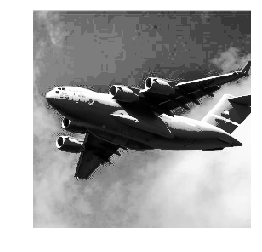

In [156]:
plt.imshow(img_enhance, cmap="gray"), plt.axis("off")

In [157]:
#when we have a color image, we first need to convert the image to the YUV color format. 
#The Y is the luma, or brightness, and U and V denote the color. 
#After the conversion, we can apply equalizeHist to the image

In [158]:
img1 = cv2.imread("Documents/Learning/simulated_datasets-master/images/plane.jpg")

In [159]:
img_yuv = cv2.cvtColor(img1, cv2.COLOR_BGR2YUV)

In [160]:
#plt.imshow(img_yuv)

In [161]:
img_yuv[:, :, 0] = cv2.equalizeHist(img_yuv[:, :, 0])

In [162]:
img_rgb = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2RGB)

(<matplotlib.image.AxesImage at 0x123a3d668>, (-0.5, 3599.5, 2269.5, -0.5))

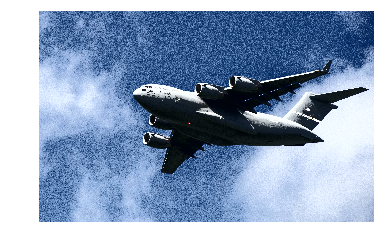

In [164]:
plt.imshow(img_rgb), plt.axis("off")

### Isolating Colors

In [166]:
#Isolate color in an image
#Define a range of colors and then apply a mask to the image

In [167]:
image_bgr = cv2.imread("Documents/Learning/simulated_datasets-master/images/plane_256x256.jpg")

In [169]:
image_hsv = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2HSV)

In [170]:
#Define range of blue

In [172]:
lower_blue=np.array([50, 100, 50])

In [173]:
upper_blue=np.array([130, 255, 255])

In [175]:
mask=cv2.inRange(image_hsv, lower_blue, upper_blue)

In [177]:
image_bgr_masked = cv2.bitwise_and(image_bgr, image_bgr, mask=mask)

In [178]:
image_rgb = cv2.cvtColor(image_bgr_masked, cv2.COLOR_BGR2RGB) 

(<matplotlib.image.AxesImage at 0x12559b160>, (-0.5, 255.5, 255.5, -0.5))

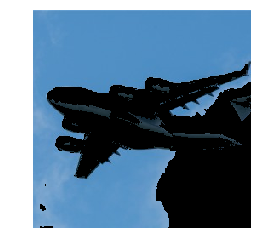

In [179]:
plt.imshow(image_rgb), plt.axis("off")

In [182]:
#To islolate the colors, first convert an image into HSV (hue, saturation, and value). 
#Second, we define a range of values we want to isolate, Third, we create a mask for the image.
#Finally, we apply the mask to the image using bitwise_and and convert to our desired output format.

(<matplotlib.image.AxesImage at 0x1295707b8>, (-0.5, 255.5, 255.5, -0.5))

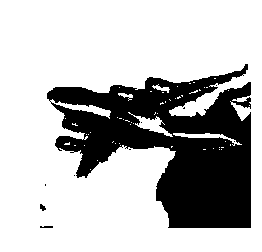

In [183]:
plt.imshow(mask, cmap="gray"), plt.axis("off")

### Binarizing Images

In [184]:
#Output the image in simplified way

In [186]:
#Thresholding is the process of setting pixels with intensity greater than some value to be white and 
#less than the value to be black. A more advanced technique is adaptive thresholding, 
#where the threshold value for a pixel is determined by the pixel intensi‐ ties of its neighbors. 

In [189]:
max_output_value = 255
neighborhood_size = 99
subtract_from_mean = 10
image_binarized = cv2.adaptiveThreshold(image256,
                                        max_output_value,
                                        cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                        cv2.THRESH_BINARY,
                                        neighborhood_size,
                                        subtract_from_mean)

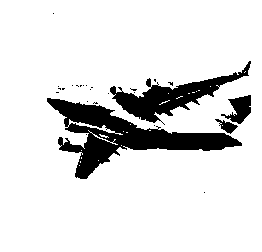

In [190]:
plt.imshow(image_binarized, cmap="gray"), plt.axis("off")
plt.show()

In [191]:
#AdaptiveThreshold has four important arguments in adaptiveThreshold. 
#max_out put_value simply determines the maximum intensity of the output pixel intensities. 
#cv2.ADAPTIVE_THRESH_GAUSSIAN_C sets a pixel’s threshold to be a weighted sum of the neighboring pixel intensities. 
#The weights are determined by a Gaussian window. 
#Alternatively we could set the threshold to simply the mean of the neighboring pixels with cv2.ADAPTIVE_THRESH_MEAN_C

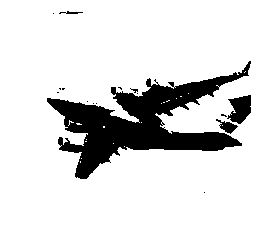

In [193]:
image_mean_threshold = cv2.adaptiveThreshold(image256,
                                                 max_output_value,
                                                 cv2.ADAPTIVE_THRESH_MEAN_C,
                                                 cv2.THRESH_BINARY,
                                                 neighborhood_size,
                                                 subtract_from_mean)
# Show image
plt.imshow(image_mean_threshold, cmap="gray"), plt.axis("off")
plt.show()

In [195]:
#The last two parameters are the block size (the size of the neighborhood used to determine a pixel’s threshold) 
#and a constant subtracted from the calculated threshold (used to manually fine-tune the threshold).

#A major benefit of thresholding is denoising an image—keeping only the most important elements. 

### Removing Backgrounds

In [197]:
#Isolate the foreground of the image
#Mark a rectangle around the desired foreground, then run the GrabCut algorithm

In [198]:
image_rgb = cv2.cvtColor(image256, cv2.COLOR_BGR2RGB)

In [201]:
#Rectangle values: start x, start y, width, height
rect = (0, 56, 256, 150)

In [202]:
# Create initial mask
mask = np.zeros(image_rgb.shape[:2], np.uint8)

In [203]:
# Create temporary arrays used by grabCut
bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)

In [205]:
cv2.grabCut(image_rgb,
           mask,
           rect,
           bgdModel,
           fgdModel,
           5,
           cv2.GC_INIT_WITH_RECT)

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 array([[4.30531556e-01, 9.02040648e-02, 1.43441948e-01, 2.18670287e-01,
         1.17152144e-01, 1.29671078e+02, 1.29671078e+02, 1.29671078e+02,
         1.65170353e+02, 1.65170353e+02, 1.65170353e+02, 1.46482576e+02,
         1.46482576e+02, 1.46482576e+02, 1.36324271e+02, 1.36324271e+02,
         1.36324271e+02, 1.76053556e+02, 1.76053556e+02, 1.76053556e+02,
         2.13870676e+00, 2.12870676e+00, 2.12870676e+00, 2.12870676e+00,
         2.13870676e+00, 2.12870676e+00, 2.12870676e+00, 2.12870676e+00,
         2.13870676e+00, 1.34936365e+01, 1.34836365e+01, 1.34836365e+01,
         1.34836365e+01, 1.34936365e+01, 1.34836365e+01, 1.34836365e+01,
         1.34836365e+01, 1.34936365e+01, 5.65407806e+01, 5.65307806e+01,
         5.65307806e+01, 5.65307806e+01, 5.6